In [75]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [76]:
# Figure configuration
import matplotlib as mpl
plt.rcParams['figure.figsize'] = (16, 6)


In [77]:
# Load and Define dataset:
start_date = datetime(2023,1,1)
end_date = datetime(2023,10,31)
DATA_raw = pd.read_csv('INFOP7374_FeatureMart4GS.csv', index_col = [0])

In [78]:
DATA_raw

,Date,Open,High,Low,Close,Adj Close,Volume,Mkt-RF,SMB,HML,...,RIFSPPFAAD90NB,DCPN3M,DCPF1M,DCOILWTICO,DHHNGSP,USRECD,USRECDM,USRECDP,Yest_Close,stock_return
1,2020-01-03,231.240005,234.500000,230.229996,232.639999,232.639999,1315400,-0.67,0.30,0.00,...,1.70,1.60,1.55,63.00,2.06,0.0,0.0,0.0,233.419998,-0.003342
2,2020-01-06,231.490005,235.529999,230.800003,235.429993,235.429993,1460700,0.36,-0.20,-0.55,...,1.68,1.60,1.55,63.27,2.10,0.0,0.0,0.0,232.639999,0.011993
3,2020-01-07,235.500000,236.850006,233.339996,233.699997,233.699997,1367900,-0.19,-0.03,-0.25,...,1.66,1.62,1.56,62.70,2.17,0.0,0.0,0.0,235.429993,-0.007348
4,2020-01-08,234.880005,238.009995,234.009995,237.270004,237.270004,1883900,0.47,-0.17,-0.64,...,1.64,1.61,1.53,59.65,2.09,0.0,0.0,0.0,233.699997,0.015276
5,2020-01-09,239.220001,239.470001,235.289993,235.899994,235.899994,1141300,0.65,-0.71,-0.48,...,1.70,1.61,NaN,59.56,2.05,0.0,0.0,0.0,237.270004,-0.005774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,2023-10-25,401.000000,403.820007,396.119995,396.700012,396.700012,1309700,-1.58,-0.02,0.84,...,5.50,5.37,NaN,86.07,2.86,0.0,0.0,0.0,403.369995,-0.016536
961,2023-10-26,393.179993,394.040009,386.000000,388.619995,388.619995,1837200,-1.15,1.19,1.66,...,NaN,5.40,NaN,83.80,2.87,0.0,0.0,0.0,396.700012,-0.020368
962,2023-10-27,390.000000,392.209991,384.369995,386.820007,386.820007,1448600,-0.53,-0.58,-0.57,...,5.49,5.36,5.36,86.04,3.24,0.0,0.0,0.0,388.619995,-0.004632
963,2023-10-30,388.440002,393.269989,387.750000,391.750000,391.750000,1005200,1.15,-0.34,0.28,...,NaN,NaN,5.40,83.03,3.17,0.0,0.0,0.0,386.820007,0.012745


In [79]:
# Display the number of NaN values in each column
nan_counts = DATA_raw.isnull().sum()

# Display the result
print("Number of NaN values in each column:")
print(nan_counts)


Number of NaN values in each column:
Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
Mkt-RF              0
SMB                 0
HML                 0
RMW                 0
CMA                 0
RF                  0
ADS_Index           0
SP500               0
AMERIBOR            0
T10YIE              7
T5YIE               7
BAMLH0A0HYM2        0
BAMLH0A0HYM2EY      0
DGS10               7
DGS1                7
RIFSPPFAAD90NB    277
DCPN3M            373
DCPF1M            513
DCOILWTICO          3
DHHNGSP             6
USRECD              0
USRECDM             0
USRECDP             0
Yest_Close          0
stock_return        0
dtype: int64


In [80]:
start_date = datetime(2023,1,1)
end_date = datetime(2023,10,31)
DATA_raw['Date'] = pd.to_datetime(DATA_raw['Date'])
mask = (DATA_raw['Date'] >= start_date) & (DATA_raw['Date'] <= end_date)
DATA_raw = DATA_raw.loc[mask]
DATA_raw.reset_index(drop = True, inplace = True)


In [81]:
# copy the data
DATA = DATA_raw.copy()
# NORMALIZATION
for column in DATA_raw.columns[1:]:
    if column != 'Adj Close':
        DATA[column] = (DATA_raw[column] -
                               DATA_raw[column].mean()) / DATA_raw[column].std()
        
DATA.columns
columns_to_drop = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Yest_Close','stock_return','USRECD','USRECDM','USRECDP']



In [82]:
#Drop the specified columns
X = DATA.drop(columns = columns_to_drop)
X = X.fillna(method='bfill')


y = DATA['Adj Close']



In [83]:
#Data Issues:
missing_values = X.isnull().sum()
X['DCPF1M'].fillna(method='ffill', inplace=True)



In [84]:
#calling the model
lasso = Lasso()

# The parameter grid to search for the best alpha value
param_grid = {'alpha': np.logspace(-8, 6, 90)}
# Initialize GridSearchCV
search = GridSearchCV(lasso, param_grid, cv=5).fit(X, y)
print("The best hyperparameters are ", search.best_params_)

lasso_best = Lasso(alpha=search.best_params_['alpha'])
lasso_best.fit(X, y)

coefficients = lasso_best.coef_

# Create a DataFrame for easier visualization
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Filter out features with zero coefficients
important_features = feature_importance[feature_importance['Coefficient'] != 0]

# Sort the features by the absolute value of their coefficients
important_features = important_features.reindex(important_features['Coefficient'].abs().sort_values(ascending=True).index)



C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.208e+03, tolerance: 1.154e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.721e+03, tolerance: 1.552e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.202e+03, toleranc

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.706e+03, tolerance: 1.552e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.231e+03, tolerance: 2.032e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.734e+02, toleranc

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.080e+03, tolerance: 1.154e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.630e+03, tolerance: 1.552e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.958e+03, toleranc

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.016e+03, tolerance: 1.670e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.831e+03, tolerance: 1.154e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.577e+03, toleranc

C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.643e+01, tolerance: 1.670e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.751e+01, tolerance: 1.154e+01
  model = cd_fast.enet_coordinate_descent(
C:\Users\gauri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.658e+01, toleranc

The best hyperparameters are  {'alpha': 1.5127782816797033}


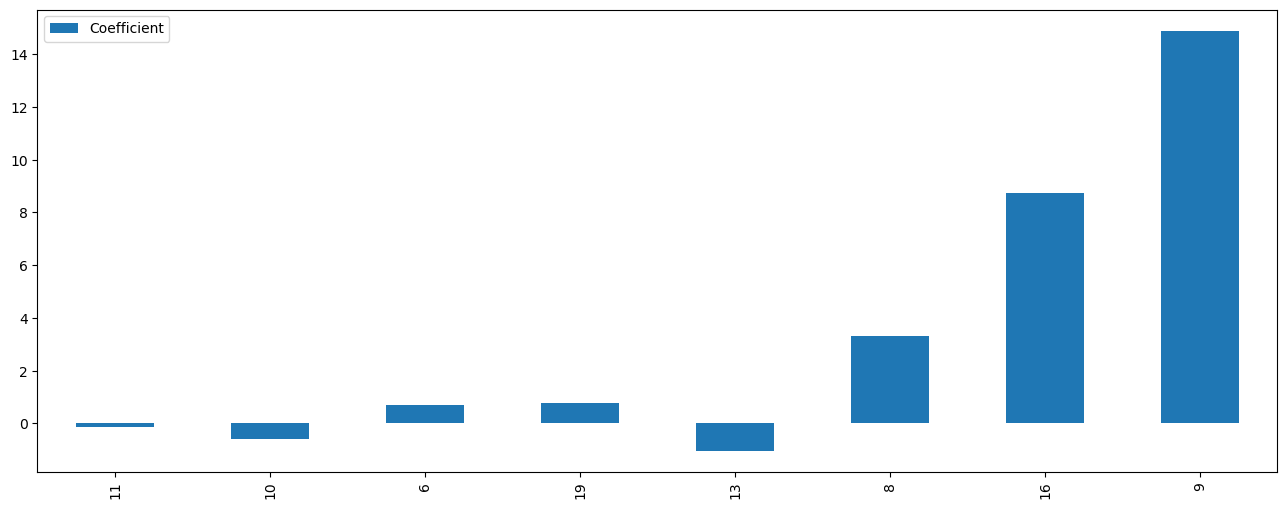

In [85]:
important_features.plot(kind='bar');

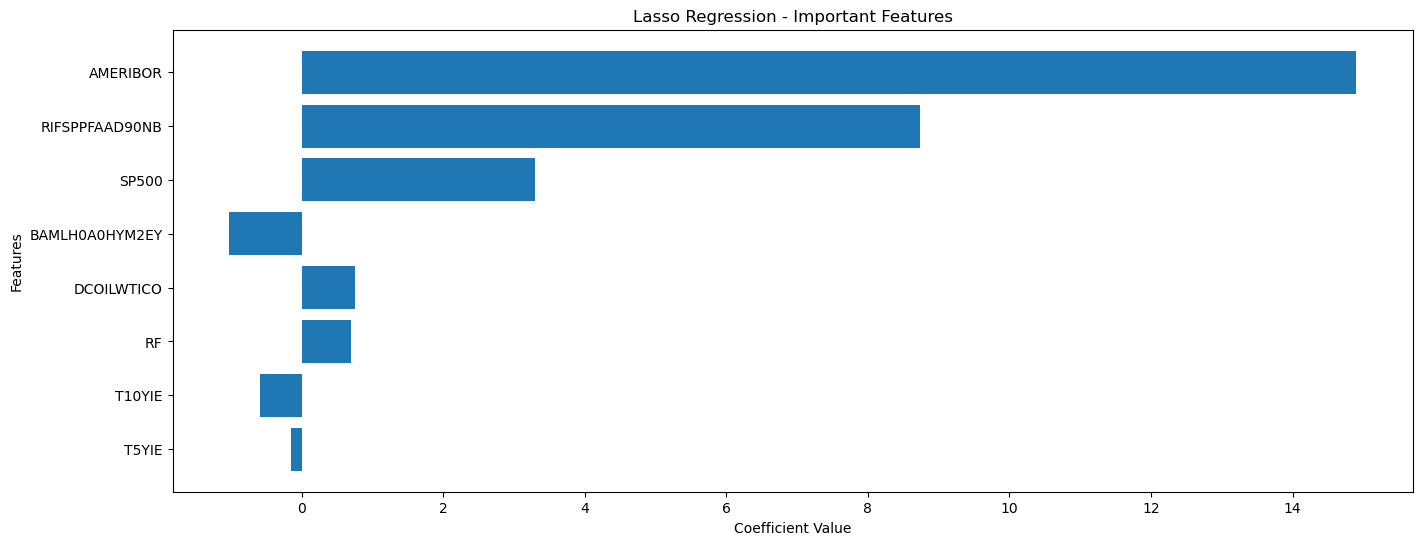

In [89]:
import matplotlib.pyplot as plt

# Assuming 'important_features' DataFrame is already defined
# You can use the code you provided to generate 'important_features'

# Plotting the coefficients
plt.barh(important_features['Feature'], important_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Lasso Regression - Important Features')
plt.show()


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_best.fit(X_train, y_train)

y_hat = lasso_best.predict(X_test)

#There is no overfitting given the STD of RMSE is smaller than RMSE

In [87]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_hat)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('RMSE:',rmse)

RMSE: 14.99178208802605


In [88]:
# Cross Validation:
# Perform cross-validation
cv_scores = cross_val_score(lasso_best, X, y, cv=5, scoring='neg_mean_squared_error')

# Let's get the mean score
mean_cv_score = np.mean(cv_scores)

# Print the results
print("Mean Cross-Validation Score:", mean_cv_score)

# Evaluate Model:
# Calculate the mean squared error and convert it back to positive
mse_scores = -cv_scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

rmse = np.mean(np.sqrt(np.abs(cv_scores)))
std_rmse = np.std(np.sqrt(np.abs(cv_scores)))
print('---------------------------------------','\n')
print(f'MEAN of Mean Squared Error: {mean_mse}')
print('---------------------------------------','\n')
print(f'STD of RMSE Squared Error: {std_rmse}')
print('---------------------------------------','\n')
print(f'Root Mean Squared Error on Test Set: {rmse}')
print('---------------------------------------','\n')

Mean Cross-Validation Score: -493.4662321247396
--------------------------------------- 

MEAN of Mean Squared Error: 493.4662321247396
--------------------------------------- 

STD of RMSE Squared Error: 4.7886047683680575
--------------------------------------- 

Root Mean Squared Error on Test Set: 21.69183017859725
--------------------------------------- 

